In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
file_path = './clustering_data.csv'
data = pd.read_csv(file_path)

# get the stock names and prices
stock_names = data.iloc[:, 0]  
stock_prices = data.iloc[:, 1:]  
print(stock_prices)


    1/28/2011  4/29/2011  5/20/2011  4/1/2011  5/27/2011  6/17/2011  \
0   -4.755700   4.005090   3.581550 -0.395257   0.768624   1.125940   
1   -3.201900   5.654880  -1.449280  0.693878   0.574788   1.505610   
2   -0.553840   1.927910   0.529256  1.804510   2.056760  -0.869652   
3    0.431862   3.484940  -1.724140 -1.843320   0.304692  -1.122850   
4    3.819160   1.975220   0.000000  1.995930   1.565220  -0.919448   
5   -2.739730   0.418535   1.119400  0.829346  -0.629111   1.650940   
6    3.203540   5.648110  -1.454610  3.268210   3.257650  -1.011040   
7   -4.561400  -0.324675  -2.607230 -0.372578   1.918050  -1.928370   
8    2.150230   1.915300  -0.295223  2.751070  -0.217687   0.794777   
9   -0.963597   1.408450  -1.883010 -0.701481   2.271790   1.975620   
10   2.438550   1.747690   0.206113  1.689980  -0.593472   0.000000   
11   0.658256  -1.223080   0.981194  0.266951   0.000000   3.197850   
12  -1.992940   1.794990   0.581677 -0.787219   0.899149  -1.527310   
13  -2

In [ ]:
kmeans = KMeans(n_clusters=8, init='random')  # set the number of clusters to 8
kmeans.fit(stock_prices)

# get the cluster centroids
clusters = kmeans.labels_

# put the clustering results back to the data
data['Cluster'] = clusters

sse = kmeans.inertia_
print(f"SSE: {sse}")

mse = sse / len(stock_prices)

print(f"MSE: {mse}")

# print the clustering results
clustered_stocks = pd.DataFrame(columns=['Cluster', 'Stock Names'])
pd.set_option('display.max_colwidth', None)

for cluster in range(8):
    cluster_stocks = stock_names[data['Cluster'] == cluster].tolist()
    new_row = pd.DataFrame({'Cluster': [cluster], 'Stock Names': [', '.join(cluster_stocks)]})
    clustered_stocks = pd.concat([clustered_stocks, new_row], ignore_index=True)

print(clustered_stocks)

SSE: 1697.892698131005
MSE: 56.5964232710335
  Cluster  \
0       0   
1       1   
2       2   
3       3   
4       4   
5       5   
6       6   
7       7   

                                                                                                                             Stock Names  
0                                                                                               Chevron, Caterpillar, Pfizer, ExxonMobil  
1                                                                                                      Bank of America, Microsoft, Alcoa  
2  DuPont, IBM, The Home Depot, Intel, Wal-Mart, General Electric, United Technologies, Travelers, JPMorgan Chase, 3M, Johnson & Johnson  
3                                                                                                                        Hewlett-Packard  
4                                                                    Kraft, Verizon, Procter & Gamble, AT&T, Merck, McDonalds, Coca-Cola  
5  

In [ ]:
# improve the clustering results
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=1000, n_init=1000)  # split into 8 clusters
kmeans.fit(stock_prices)

# get the cluster results
clusters = kmeans.labels_

# put the cluster results back into the original data
data['Cluster'] = clusters

sse = kmeans.inertia_
print(f"SSE: {sse}")

mse = sse / len(stock_prices)

print(f"MSE: {mse}")


# print the clustering results
clustered_stocks = pd.DataFrame(columns=['Cluster', 'Stock Names'])
pd.set_option('display.max_colwidth', None)

for cluster in range(8):
    cluster_stocks = stock_names[data['Cluster'] == cluster].tolist()
    new_row = pd.DataFrame({'Cluster': [cluster], 'Stock Names': [', '.join(cluster_stocks)]})
    clustered_stocks = pd.concat([clustered_stocks, new_row], ignore_index=True)

print(clustered_stocks)

SSE: 1515.0941572736256
MSE: 50.50313857578752
  Cluster  \
0       0   
1       1   
2       2   
3       3   
4       4   
5       5   
6       6   
7       7   

                                                                                                                Stock Names  
0                                                       Kraft, Verizon, Procter & Gamble, AT&T, Merck, McDonalds, Coca-Cola  
1                                                                                                DuPont, Caterpillar, Alcoa  
2  Microsoft, IBM, The Home Depot, Intel, Wal-Mart, General Electric, United Technologies, Travelers, 3M, Johnson & Johnson  
3                                                                                                             Cisco Systems  
4                                                                                               Chevron, Pfizer, ExxonMobil  
5                                                                              

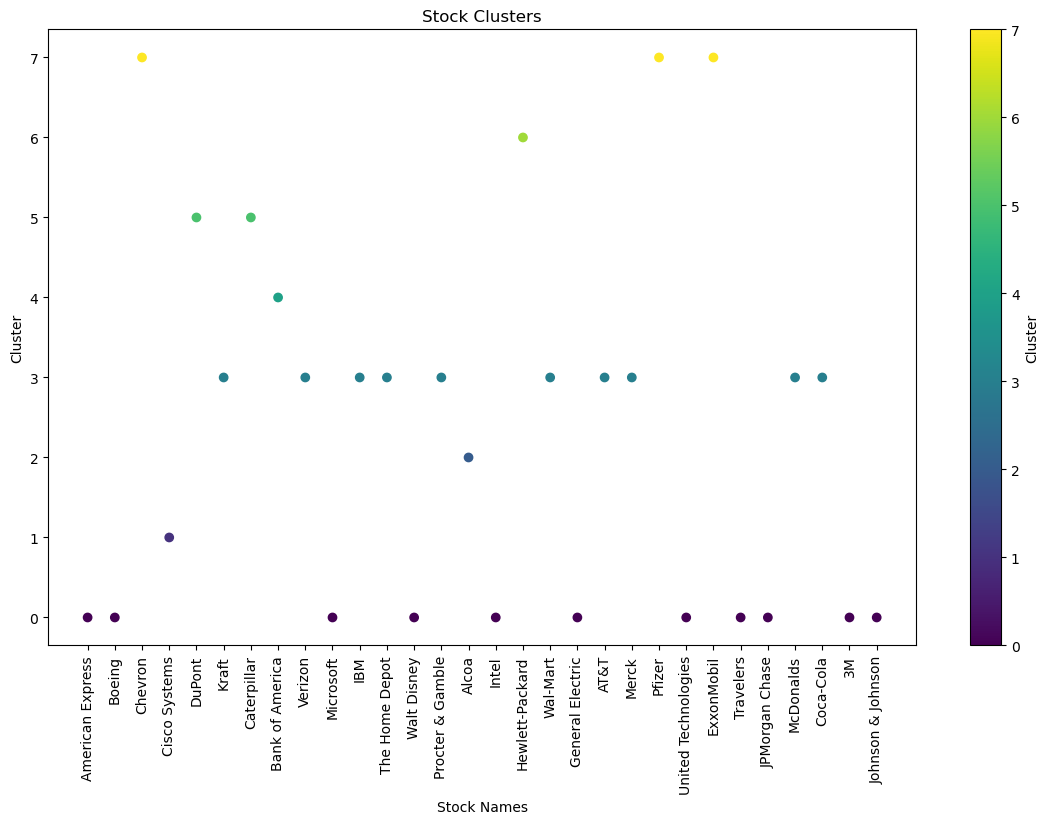

In [ ]:
# visualize the clusters
plt.figure(figsize=(14, 8))
scatter = plt.scatter(stock_names, clusters, c=clusters, cmap='viridis')
plt.title('Stock Clusters')
plt.xlabel('Stock Names')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.colorbar(scatter, label='Cluster')
plt.show()